<a href="https://colab.research.google.com/github/ainikaadutt/demo-repository/blob/main/capstone1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv("bright_automotive_company.csv")


In [1]:
df.head(15)

NameError: name 'df' is not defined

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586 entries, 0 to 1585
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1586 non-null   int64  
 1   Gender            1533 non-null   object 
 2   Profession        1575 non-null   object 
 3   Marital_status    1586 non-null   object 
 4   Education         1586 non-null   object 
 5   No_of_Dependents  1586 non-null   object 
 6   Personal_loan     1586 non-null   object 
 7   House_loan        1586 non-null   object 
 8   Partner_working   1586 non-null   object 
 9   Salary            1573 non-null   float64
 10  Partner_salary    1480 non-null   float64
 11  Total_salary      1586 non-null   int64  
 12  Price             1586 non-null   int64  
 13  Make              1586 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 173.6+ KB


In [ ]:
df.describe()

,Age,Salary,Partner_salary,Total_salary,Price
count,1586.000000,1573.000000,1480.000000,1586.000000,1586.000000
mean,32.018916,60340.368722,20348.513514,79806.431274,36006.972257
std,8.778502,14656.106826,19655.841385,25707.764534,21168.286950
min,14.000000,30000.000000,0.000000,30000.000000,58.000000
25%,25.000000,51900.000000,0.000000,60500.000000,25000.000000
50%,29.000000,59500.000000,25700.000000,78050.000000,31000.000000
75%,38.000000,71800.000000,38300.000000,95975.000000,47000.000000
max,120.000000,99300.000000,80500.000000,171000.000000,680000.000000


In [ ]:
print(df.isnull().sum())
#we have null/missing values

Age                   0
Gender               53
Profession           11
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary               13
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64


In [ ]:
# Step 1: Handle missing values

# (a) Categorical columns → fill with mode
for col in df.select_dtypes(include=['object']).columns:
    if df[col].isnull().any():
        mode_val = df[col].mode()[0]
        df[col].fillna(mode_val, inplace=True)
        print(f"Filled missing values in categorical column '{col}' with mode: {mode_val}")


Filled missing values in categorical column 'Gender' with mode: Male
Filled missing values in categorical column 'Profession' with mode: Salaried


<ipython-input-7-1361864767>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_val, inplace=True)


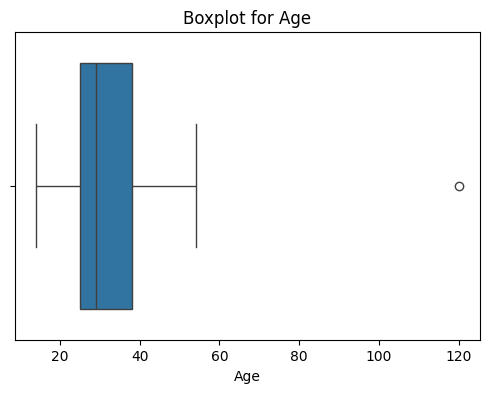

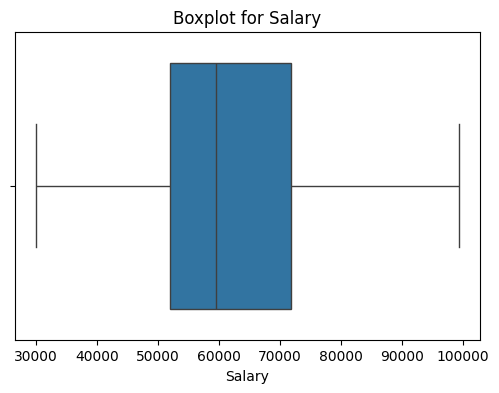

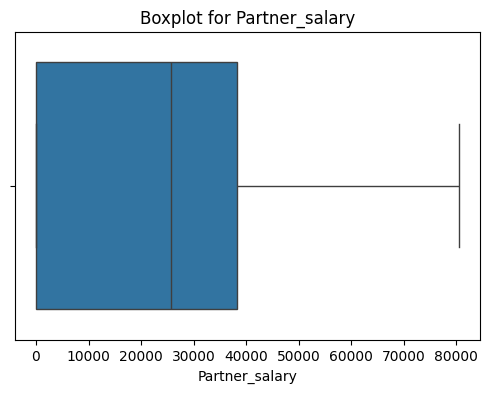

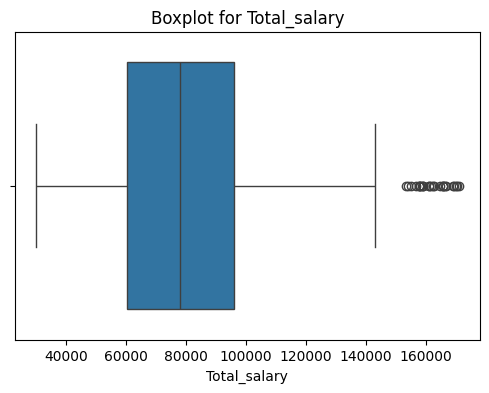

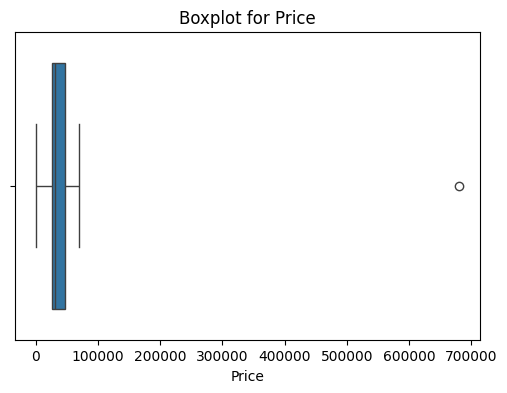

In [ ]:
# (b) Numeric columns → show boxplots before applying IQR
for col in df.select_dtypes(include=['number']).columns:
    # Visual boxplot to check outliers
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot for {col}")
    plt.show()


In [ ]:
# Step 2: Handle missing values and outliers for numerical columns
# 1: Detect Outliers using IQR
# 2: replacing outliers with boundary values
#If the column has outliers:Replace missing values with the median
#If no outliers are found:Replace missing values with the mean

for col in df.select_dtypes(include='number').columns:
    # IQR method
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Detect outliers
    has_outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).any()

    # Fill missing values and fill them
    if df[col].isnull().any():
        if has_outliers:
            fill_val = df[col].median()
            print(f"'{col}' has outliers → filled missing values with median.")
        else:
            fill_val = df[col].mean()
            print(f"'{col}' has no significant outliers → filled missing values with mean.")
        df[col].fillna(fill_val, inplace=True)

    # Replace outlier values with boundary values
    df[col] = df[col].apply(lambda x: upper_bound if x > upper_bound else
                                      lower_bound if x < lower_bound else x)
    print(f"Replaced outliers in '{col}' with boundary values.")


Replaced outliers in 'Age' with boundary values.
Replaced outliers in 'Salary' with boundary values.
Replaced outliers in 'Partner_salary' with boundary values.
Replaced outliers in 'Total_salary' with boundary values.
Replaced outliers in 'Price' with boundary values.


In [ ]:
#rechecking null values
df.isnull().sum()

,0
Age,0
Gender,0
Profession,0
Marital_status,0
Education,0
No_of_Dependents,0
Personal_loan,0
House_loan,0
Partner_working,0
Salary,0


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
#perform encoding since string values cannot be manipulated , we also have to preserve the meaning of string values while encoding them
#perform scaling
#if one value is much higher unit then it will have more impact so we need to bring all the columns in one scale

# Step 3: Encode categorical columns
df = pd.get_dummies(df, drop_first=True)

# Step 4: Scale numeric features
scaler = StandardScaler()
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

df[num_cols] = scaler.fit_transform(df[num_cols])

In [ ]:
df.columns

Index(['Age', 'Salary', 'Partner_salary', 'Total_salary', 'Price',
       'Gender_Female', 'Gender_Femle', 'Gender_Male', 'Profession_Salaried',
       'Marital_status_Single', 'Education_Post Graduate',
       'No_of_Dependents_1', 'No_of_Dependents_2', 'No_of_Dependents_3',
       'No_of_Dependents_4', 'No_of_Dependents_?', 'Personal_loan_Yes',
       'House_loan_Yes', 'Partner_working_Yes', 'Make_Hatchback', 'Make_SUV',
       'Make_Sedan'],
      dtype='object')

In [ ]:
df.head()

,Age,Salary,Partner_salary,Total_salary,Price,Gender_Female,Gender_Femle,Gender_Male,Profession_Salaried,Marital_status_Single,...,No_of_Dependents_2,No_of_Dependents_3,No_of_Dependents_4,No_of_Dependents_?,Personal_loan_Yes,House_loan_Yes,Partner_working_Yes,Make_Hatchback,Make_SUV,Make_Sedan
0,2.468039,2.670063,2.652700,2.781915,1.853362,False,False,True,False,False,...,False,False,True,False,False,False,True,False,True,False
1,2.468039,2.409634,2.631627,2.781915,1.853362,False,False,False,True,False,...,False,False,True,False,True,False,True,False,True,False
2,2.468039,2.532995,2.125864,2.781915,1.561164,True,False,False,True,False,...,False,True,False,False,False,False,True,False,True,False
3,2.468039,0.833349,2.631627,2.526623,1.853362,True,False,False,True,False,...,False,False,False,True,True,False,True,False,False,False
4,2.468039,1.326795,2.099522,2.410717,1.561164,False,False,True,True,False,...,False,True,False,False,False,False,True,False,True,False


In [ ]:
# Combine 'Gender_Femle' into 'Gender_Female'
if 'Gender_Femle' in df.columns:
    df['Gender_Female'] = df.get('Gender_Female', 0) | df['Gender_Femle']
    df.drop('Gender_Femle', axis=1, inplace=True)

In [ ]:
df.head()

,Age,Salary,Partner_salary,Total_salary,Price,Gender_Female,Gender_Male,Profession_Salaried,Marital_status_Single,Education_Post Graduate,...,No_of_Dependents_2,No_of_Dependents_3,No_of_Dependents_4,No_of_Dependents_?,Personal_loan_Yes,House_loan_Yes,Partner_working_Yes,Make_Hatchback,Make_SUV,Make_Sedan
0,2.468039,2.670063,2.652700,2.781915,1.853362,False,True,False,False,True,...,False,False,True,False,False,False,True,False,True,False
1,2.468039,2.409634,2.631627,2.781915,1.853362,False,False,True,False,True,...,False,False,True,False,True,False,True,False,True,False
2,2.468039,2.532995,2.125864,2.781915,1.561164,True,False,True,False,True,...,False,True,False,False,False,False,True,False,True,False
3,2.468039,0.833349,2.631627,2.526623,1.853362,True,False,True,False,False,...,False,False,False,True,True,False,True,False,False,False
4,2.468039,1.326795,2.099522,2.410717,1.561164,False,True,True,False,True,...,False,True,False,False,False,False,True,False,True,False


In [ ]:
#perform linear regression
y = df['Price']

# Select all columns *except* 'Price' as features
feature_columns = df.columns[df.columns != 'Price']
X = df[feature_columns]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# 🏗️ Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# 🔮 Predict on test data
y_pred = model.predict(X_test)



In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
#evaluating performance

In [ ]:
print(f" Mean Squared Error (MSE): {mse:.4f}")
print(f" R² Score: {r2:.4f}")

🔹 Mean Squared Error (MSE): 0.3403
🔹 R² Score: 0.6699


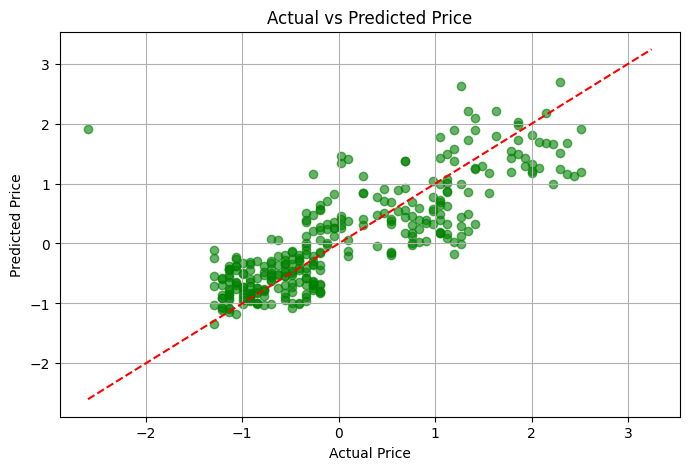

In [ ]:
#Plot Actual vs Predicted Price
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='green', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.grid(True)
plt.show()

In [ ]:
#Coefficients
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

print("\n Top Influencing Features on Price:")
print(coef_df.head(10))


 Top Influencing Features on Price:
                    Feature  Coefficient
18                 Make_SUV     0.688760
0                       Age     0.568738
9        No_of_Dependents_1     0.551483
12       No_of_Dependents_4     0.528418
5               Gender_Male     0.431014
10       No_of_Dependents_2     0.409972
4             Gender_Female     0.409727
13       No_of_Dependents_?     0.407889
3              Total_salary     0.394275
8   Education_Post Graduate     0.220981
